# Preamble

In [515]:
import sys
#sys.path.insert(0, dir_notebook)

from my_units import *
from model_functions import * 
from load_functions import *
from yellin_functions import *

i_mock = 6 # mock file number
i_m = 200

In [516]:
list_mu_0 = np.logspace(0,4,41)
list_mu_1 = np.asarray([mu for mu in np.logspace(0.2,2.2,201) if (mu not in list_mu_0)])

In [517]:
dir_home = '/mnt/home/kvantilburg/'
dir_ceph = dir_home+'ceph/LuminousBasin/'
dir_events = dir_ceph+'mocks/event_lists/'
dir_source = dir_ceph+'data/products_80610202001_orbit1_chu12_spatialARF/'
dir_production = dir_ceph+'data/production/'
dir_proj = dir_ceph+'yellin_projections/mocks/mock_'+str(i_mock)+'/'

# Compute $\overline{C}_\mathrm{max}$

In [513]:
dir_mc = dir_ceph+'yellin_vols/k10_1/'

In [ ]:
df = pd.read_csv(dir_mc+'vols_k10_imu_015.csv',
                names=['mu']+list(range(0,np.int(1.2e4),1)),skiprows=[0],index_col=False) #set no. of columns large
df = df.replace(np.nan,1)
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop[1:], axis=1)

In [264]:
vols_mc = df.to_numpy()[:,1:] #get volumes
arr_C_n = []
for n in tqdm(range(vols_mc.shape[1])):
    res = stats.cumfreq(vols_mc[:,n],numbins=1001,defaultreallimits=(0,1.0))
    x = res.lowerlimit + np.linspace(0,res.binsize*res.cumcount.size,res.cumcount.size)
    res_int = interp1d(x,res.cumcount/vols_mc.shape[0])
    arr_C_n.append(res_int)
list_C_max = np.zeros(vols_mc.shape[0])
for i in tqdm(range(vols_mc.shape[0])):
    for n,vol in enumerate(vols_mc[i]):
        if 1.0 > vol > 0.0: #if not nan
            C_n = arr_C_n[n](vol)
            list_C_max[i] = np.max([C_n,list_C_max[i]])
list_C_max[list_C_max==0] = 1.0
C_max_bar = np.quantile(list_C_max,0.9)

100%|██████████| 4399/4399 [00:00<00:00, 11996.32it/s]


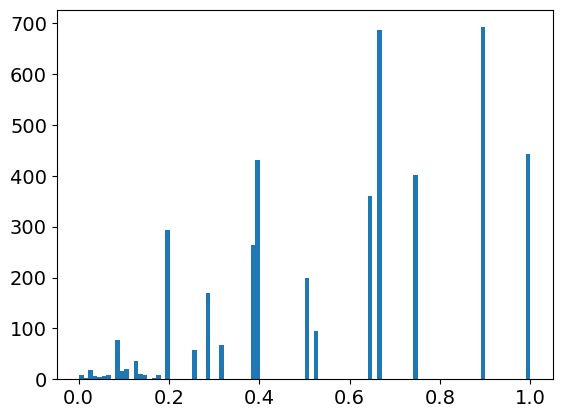

In [265]:
plt.hist(list_C_max,bins=100);

In [179]:
for i in range(vols_mc.shape[0]):
    for n,vol in enumerate(vols_mc[i]):
        if vol > 0: #if not nan
            C_n = arr_C_n[n](vol)
            list_C_max[i] = np.max([C_n,list_C_max[i]])
C_max_bar = np.quantile(list_C_max,0.9)

,mu,0,1,2,3,4,5,6,7,8,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,1.656151,0.81,0.9,0.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.656151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.656151,0.90,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.656151,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.656151,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,1.656151,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4310,1.656151,0.81,0.9,0.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4311,1.656151,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4312,1.656151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df = pd.read_csv(dir_mc+'vols_k10_imu_030.csv',
                names=['mu']+list(range(0,np.int(1.2e3),1)),skiprows=[0],index_col=False) #set no. of columns large
df = df.replace(1.,np.NaN)
df = df.dropna(axis=1,how='all') #drop columns with all nan
vols_mc = df.to_numpy()[:,1:] #get volumes

# Plot

## $k = 10$ (fine)

In [520]:
list_mu = np.logspace(0.2,2.11,201)
#df_C_max_bar = pd.read_csv(dir_ceph+'yellin_vols/k10/vols_k10_cmax_bar.csv')
#df_C_max_bar_1 = pd.read_csv(dir_ceph+'yellin_vols/k10_1/vols_k10_cmax_bar.csv')
#df_C_max_bar = df_C_max_bar.append(df_C_max_bar_1,ignore_index=True)
df_C_max_bar = pd.read_csv(dir_ceph+'yellin_vols/k10_1/vols_k10_cmax_bar.csv')
df_C_max_bar = df_C_max_bar[df_C_max_bar['mu'] !='mu']
df_C_max_bar = df_C_max_bar.astype('float')
df_C_max_bar.sort_values(by='mu',ignore_index=True,inplace=True)
err_frac = 1 / np.sqrt(df_C_max_bar['N_MC'] * (1-df_C_max_bar['C_max_bar']))
int_C_max_bar = interp1d(df_C_max_bar['mu'],df_C_max_bar['C_max_bar'],kind='linear',bounds_error=False,fill_value='extrapolate')
int_C_max_bar_2 = interp1d(df_C_max_bar['mu'],1-(1-2*err_frac)*(1-df_C_max_bar['C_max_bar']),kind='linear',bounds_error=False,fill_value=1)
df_C_max_bar

,mu,C_max_bar,N_MC
0,1.620131,1.000000,7345.0
1,1.656151,1.000000,7354.0
2,1.692973,1.000000,7348.0
3,1.730613,1.000000,7320.0
4,1.769090,1.000000,7434.0
...,...,...,...
195,117.977720,0.996623,9475.0
196,120.600748,0.998213,9515.0
197,123.282093,0.997569,9463.0
198,126.023054,0.997462,9457.0


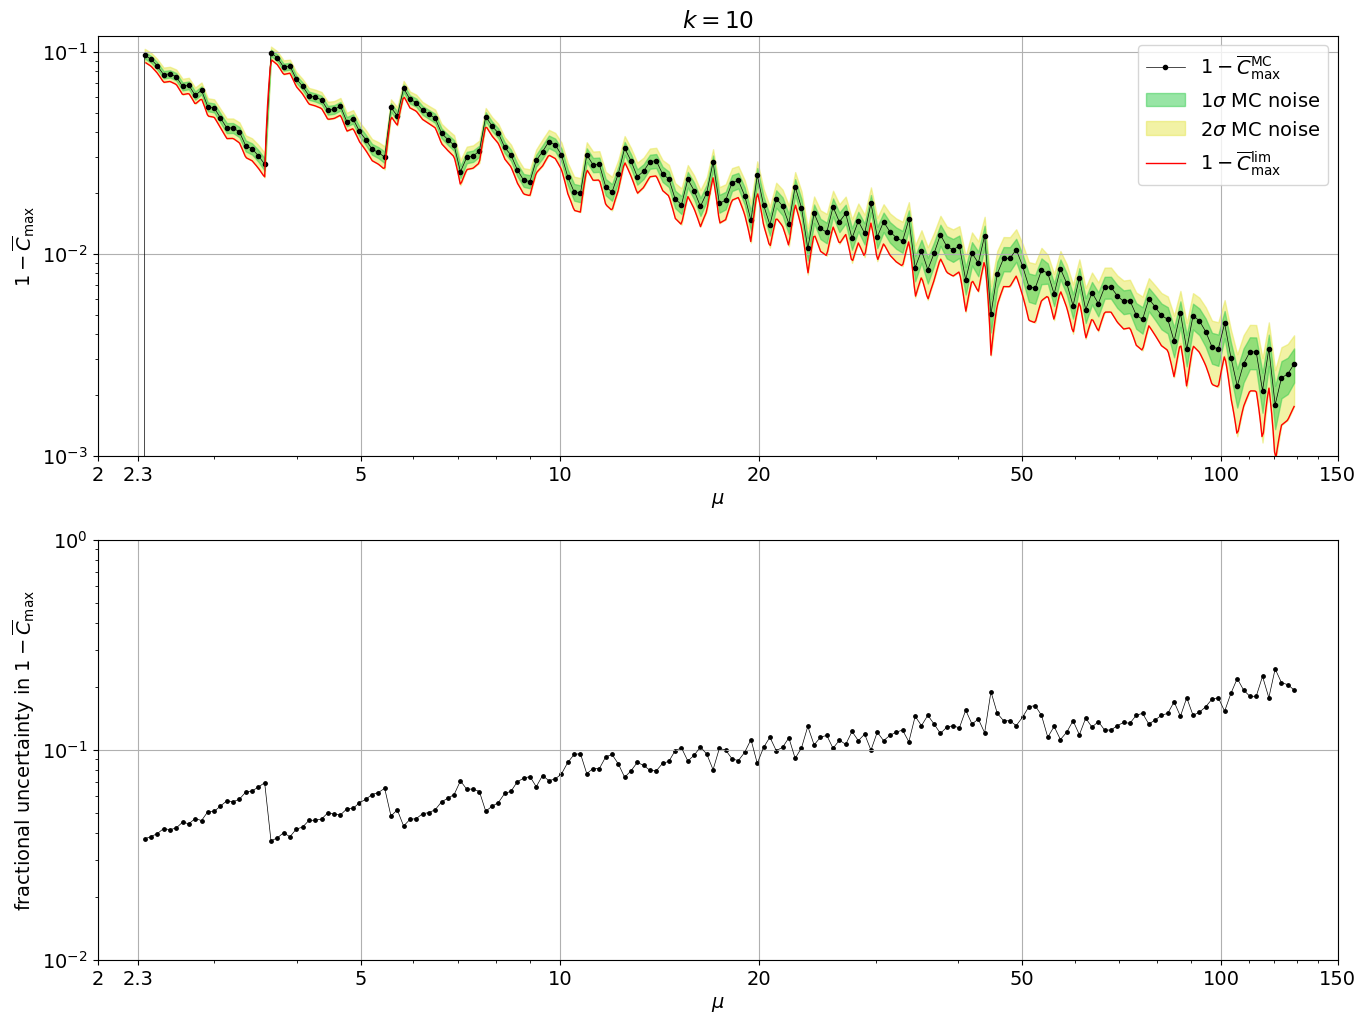

In [521]:
fig,ax = plt.subplots(2,1,figsize=(16,12))
vec_mu_plot = np.logspace(0,np.log10(np.max(df_C_max_bar['mu'])),1000)
ax[0].fill_between(df_C_max_bar['mu'],(1-2*err_frac)*(1-df_C_max_bar['C_max_bar']),(1+2*err_frac)*(1-df_C_max_bar['C_max_bar']),color=(0.9,0.9,0.3,0.5),label=r'$2\sigma$ MC noise')
ax[0].fill_between(df_C_max_bar['mu'],(1-1*err_frac)*(1-df_C_max_bar['C_max_bar']),(1+1*err_frac)*(1-df_C_max_bar['C_max_bar']),color=(0.2,0.8,0.3,0.5),label=r'$1\sigma$ MC noise')
ax[0].plot(df_C_max_bar['mu'],1-df_C_max_bar['C_max_bar'],color='black',marker='.',lw=0.5,label='$1-\overline{C}_\mathrm{max}^\mathrm{MC}$')
ax[0].plot(vec_mu_plot,1-int_C_max_bar_2(vec_mu_plot),color='red',lw=1,label='$1-\overline{C}_\mathrm{max}^\mathrm{lim}$')
#ax[0].plot(df_C_max_bar['mu'],1-int_C_max_bar(df_C_max_bar['mu']),color='blue',lw=3,label='Monte Carlo')
#ax[0].plot(df_C_max_bar['mu'],0.3/df_C_max_bar['mu'])
ax[0].set_ylim(1e-3,1.2e-1);
ax[0].set_ylabel(r'$1-\overline{C}_\mathrm{max}$');
#ax[0].legend(loc='lower left');
ax[0].set_title(r'$k=10$');
ax[1].scatter(df_C_max_bar['mu'],err_frac,color='black',s=6)
ax[1].plot(df_C_max_bar['mu'],err_frac,color='black',lw=0.5)
ax[1].set_ylim(1e-2,1);
ax[1].set_ylabel('fractional uncertainty in $1-\overline{C}_\mathrm{max}$');
for i in [0,1]:
    ax[i].set_xlabel(r'$\mu$'); 
    ax[i].set_xscale('log'); ax[i].set_yscale('log'); ax[i].set_xlim(2,150); 
    x_ticks = [2,2.3,5,10,20,50,100,150]
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels([str(x_tick) for x_tick in x_ticks])
    ax[i].set_xticks(np.concatenate([np.arange(2,10,1.),np.arange(10,150,10.)]),minor=True)
    ax[i].set_xticklabels([],minor=True)
    ax[i].grid()
handles, labels = ax[0].get_legend_handles_labels()
order = [0,3,2,1]
ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order]);

In [442]:
k=10
i_mock = 6
i_m = 10
file_proj = dir_proj+'proj/proj_'+str(i_mock)+'_'+str(i_m)+'_fid.csv'

In [443]:
file_proj

'/mnt/home/kvantilburg/ceph/LuminousBasin/yellin_projections/mocks/mock_6/proj/proj_6_10_fid.csv'

In [444]:
file_vol = dir_proj+'vols/vol_'+f'{i_down:02d}'+'/'+'vols_k'+str(k)+'_'+str(i_mock)+'_'+str(i_m)+'_fid.csv'

df_proj = pd.read_csv(file_proj)

In [447]:
N_vols = len(df_proj)
np.log(N_vols/100)/np.log(2)

7.721441019070327

In [449]:
i_down = 8
len(df_proj.sample(frac=2**(-i_down)))

82

In [419]:
file_vol = dir_proj+'vols/vols_k'+str(k)+'_'+str(i_mock)+'_'+str(i_m)+'_d_'+f'{i_down:02d}'+'_fid.csv'
file_vol

'/mnt/home/kvantilburg/ceph/LuminousBasin/yellin_projections/mocks/mock_6/vols/vols_k10_6_200_d_09_fid.csv'

In [420]:
N_vols

34

In [441]:
np.log(N_vols/100)/np.log(2)

-1.556393348524385

In [427]:
np.ceil(np.log(N_vols*1.1)/np.log(2))

6.0

In [428]:
np.int(np.ceil(np.log(N_vols)/np.log(2)))

6